# Runge-Kutta X Método Adams-Bashforth X Adams-Moulton

Considere o Problema de Valor Inicial (PVI):

$y'(t) = 1 - 2y(t) + 2t$, $\qquad t \geq 0$, $\qquad y(0)=y_0=e^4 - 2$

A solução analítica é $y(t) = e^{-2t} + t$.

Essa equação diferencial ordinária (EDO) é rígida. Isso significa que alguns métodos numéricos para resolvê-la serão instáveis, a menos que o tamanho do passo tomado seja suficientemente pequeno.

In [66]:
import matplotlib.pyplot as plt
import numpy as np

In [70]:
def f(x, y):
    return 1 - 2*y + 2*x

def analytic(ti=0., tf=100., N=10000):
    h = (tf - ti) / N
    f_analytic = lambda t: np.exp(-2*t) + t
    listY = []
    t = ti
    for _ in range(N+1): #+1 para incluir o y0
        y = f_analytic(t)
        listY.append(y)
        t += h
        
    return listY

def eulerMethod(y0, ti=0., tf=100., N=10000):
    h = (tf - ti) / N
    listY = [y0]
    y_n = y0
    x = ti
    
    for _ in range(N):        
        y_np1 = y_n + h*f(x, y_n)
        listY.append(y_np1)
        y_n = y_np1
        x+=h
    
    return listY

def rk4(h, y_n, x):
    #Essa função é usada pelo Runge-Kutta
    # e também pelos métodos de passo-múltiplo.
    # Por isso o valor de h deve ser passado.
    # Para o Runge-Kutta, h será positivo.
    # Já para os métodos de passo-múltiplo, negativo (usado para calcular passos anteriores ao inicial)
    k1 = f(x, y_n)
    k2 = f(x + h/2., y_n + (h/2.)*k1)
    k3 = f(x + h/2., y_n + (h/2.)*k2)
    k4 = f(x + h, y_n + h*k3)
    
    y_np1 = (h/6.)*(k1 + k2 + k3 + k4)
    
    return y_np1

def rungeKutta4thOrder(y0, ti=0., tf=100., N=10000):
    h = (tf - ti) / N
    listY = [y0]
    y_n = y0
    x = ti
    
    for _ in range(N):        
        y_np1 = rk4(h, y_n, x)
        listY.append(y_np1)
        y_n = y_np1
        x+=h
    
    return listY
    
def adamsBashforth4thOrder(y0, ti=0., tf=100., N=10000):
    h = (tf - ti) / N    
    y_n = y0
    x = ti
    #Calculo os passos iniciais pelo Runge-Kutta
    #Uso h negativo para cacular nos instantes do passado
    y_nm1 = rk4(-h, y0, x-h)
    y_nm2 = rk4(-h, y_nm1, x-2.*h)
    y_nm3 = rk4(-h, y_nm2, x-3.*h)
    listY = [y_nm3, y_nm2, y_nm1, y0]
    
    for _ in range(N):
        y_np1 = y_n + h*((55./24.)*f(x, y_n) - (59./24.)*f(x-h, y_nm1) + (37./24.)*f(x-2*h, y_nm2) - (3./8.)*f(x-3*h, y_nm3))        
        listY.append(y_np1)        
        y_n = y_np1
        y_nm1 = listY[-2]
        y_nm2 = listY[-3]
        y_nm3 = listY[-4]
        x+=h
        
    return listY[3:]

def newtonMethod(h, x, y_n, y_nm1, y_nm2, x0=10):
    #x0 = Chute inicial
    
    f_deriv = lambda h: 1 + 2.*h*(3./8.)
    f_func = lambda h, x, y_np1, y_n, y_nm1, y_nm2: y_np1 - h*((3./8.)*f(x + h, y_np1)) - y_n + h*(19./24.)*f(x, y_n) -h*(5./24.)*f(x - h, y_nm1) + h*(1./24.)*f(x - 2.*h, y_nm2)
    
    i=0 #Faço 200 iterações
    xn = x0
    while (i<200):
        xn = xn - f_func(h, x, xn, y_n, y_nm1, y_nm2)/f_deriv(h)
        i+=1
    return x

def adamsMoulton4thOrder(y0, ti=0., tf=100., N=10000):
    h = (tf - ti) / N
    y_n = y0
    x = ti
    #Calculo os passos iniciais pelo Runge-Kutta
    #Uso h negativo para cacular nos instantes do passado
    y_nm1 = rk4(-h, y0, x-h)
    y_nm2 = rk4(-h, y_nm1, x-2.*h)
    listY = [y_nm2, y_nm1, y0]
    
    for _ in range(N):
        #Temos a equação implícita
        #y_np1 - h*((3./8.)*f(x+h,y_np1)) = y_n + h*(19./24.)*f(x, y_n) -h*(5./24.)*f(x-h, y_nm1) + h*(1./24.)*f(x - 2*h, y_nm2)
        #Queremos a raiz dessa equação para y_np1
        #Vamos fazer isso pelo método de Newton
        #Uso como chute inicial o último y calculado
        y_np1 = newtonMethod(h, x, y_n, y_nm1, y_nm2, x0=y_n)
        listY.append(y_np1)
        y_n = y_np1
        y_nm1 = listY[-2]
        y_nm2 = listY[-3]
        x+=h
                
    return listY[2:]

def adamsBashforthMoultonPredictorCorrector4thOrder(y0, ti=0., tf=100., N=10000):
    h = (tf - ti) / N    
    y_n = y0
    x = ti
    #Calculo os passos iniciais pelo Runge-Kutta
    #Uso h negativo para cacular nos instantes do passado
    y_nm1 = rk4(-h, y0, x-h)
    y_nm2 = rk4(-h, y_nm1, x-2.*h)
    y_nm3 = rk4(-h, y_nm2, x-3.*h)    
    listY = [y_nm3, y_nm2, y_nm1, y0]    
    
    for _ in range(N):
        #Passo preditor Adams-Bashforth
        y_np1 = y_n + h*((55./24.)*f(x, y_n) - (59./24.)*f(x-h, y_nm1) + (37./24.)*f(x-2*h, y_nm2) - (3./8.)*f(x-3*h, y_nm3))
        
        #Passo corretor Adams-Moulton
        y_np1 = y_n + h*((3./8.)*f(x+h, y_np1) + (19./24.)*f(x, y_n) - (5./24.)*f(x - h, y_nm1) + (1./24.)*f(x - 2*h, y_nm2))
        
        listY.append(y_np1)        
        y_n = y_np1
        y_nm1 = listY[-2]
        y_nm2 = listY[-3]
        y_nm3 = listY[-4]
        x+=h
        
    return listY[3:]

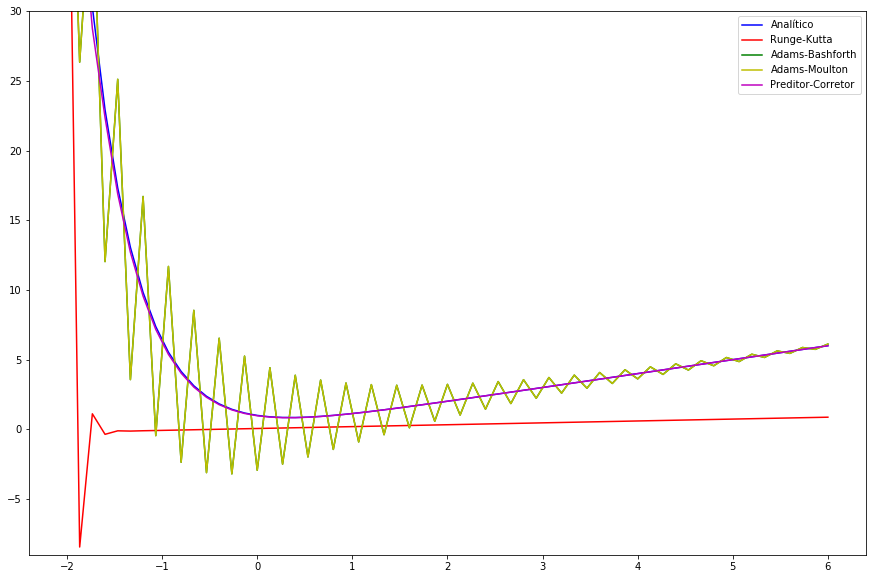

In [76]:
ti = -2.0
tf = 6.0
N = 60
y0 = np.exp(4) - 2

ts = np.linspace(ti, tf, N+1)

y_analytic = analytic(ti, tf, N)
y_rk = rungeKutta4thOrder(y0, ti, tf, N)
y_ab = adamsBashforth4thOrder(y0, ti, tf, N)
y_am = adamsMoulton4thOrder(y0, ti, tf, N)
y_pc = adamsBashforthMoultonPredictorCorrector4thOrder(y0, ti, tf, N)

plt.figure(figsize=(15,10))
plt.plot(ts, y_analytic, 'b', label="Analítico")
plt.plot(ts, y_rk, 'r', label="Runge-Kutta")
plt.plot(ts, y_ab, 'g', label="Adams-Bashforth")
plt.plot(ts, y_ab, 'y', label="Adams-Moulton")
plt.plot(ts, y_pc, 'm', label="Preditor-Corretor")

plt.ylim(-9, 30)
plt.legend(loc=0)
plt.show()